# Seasonality

References:
- median and standard error https://influentialpoints.com/Training/standard_error_of_median.htm

In [1]:
import os
from pathlib import Path
import pickle

import pandas as pd
import numpy as np
import xarray as xr
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
REPO_ROOT = Path('/Users/rwegener/repos/chesapeake_mhw')
SAVE_FIGS = False

In [3]:
path = os.path.join(REPO_ROOT, 'data/02_interim', 'mhw_eventstats_dict.pickle')
with open(path, 'rb') as handle:
    event_statistics = pickle.load(handle)

## New Analysis: Seasonality of MHW

In [4]:
def get_season(row):
    season = None
    if row.date_start.month in [6, 7, 8]:
        # season = 'JJA'
        season = 2
    elif row.date_start.month in [9, 10, 11]:
        # season = 'SON'
        season = 3
    elif row.date_start.month in [12, 1, 2]:
        # season = 'DJF'
        season = 4
    elif row.date_start.month in [3, 4, 5]:
        # season = 'MAM'
        season = 1
    else:
        season = np.nan
    return season

In [5]:
# Count of mhw grouped by month
months = []
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # This line isn't necessary if we just add a groupby('month').count()
            # at the end of a collective full_df
            months = months + df.date_start.dt.month.tolist()

months_np = np.array(months)

Text(0.5, 0, 'month')

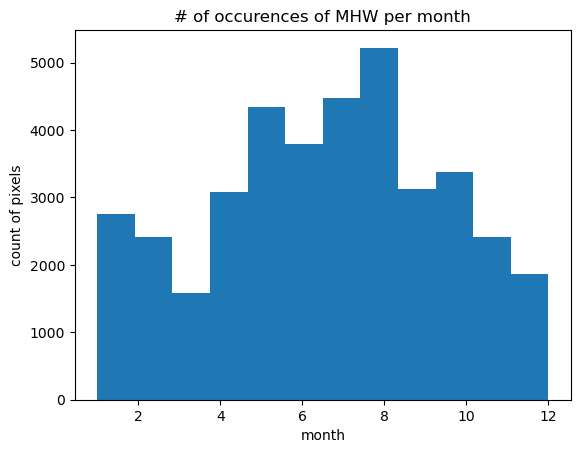

In [6]:
plt.hist(months_np, bins=12)
plt.title('# of occurences of MHW per month')
plt.ylabel('count of pixels')
plt.xlabel('month')

BELOW: this doesn't work (to naively try to transfer). To figure something like this out we'll need to keep track of the months and then do an average at the end

In [8]:
# Count of mhw grouped by month
months = []
full_df = pd.DataFrame()
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # months = months + df.date_start.dt.month.tolist()
            full_df = pd.concat([full_df, df])

# months_np = np.array(months)

In [9]:
full_df[full_df.time_start == 731725]

,time_start,time_end,time_peak,date_start,date_end,date_peak,index_start,index_end,index_peak,duration,...,intensity_cumulative_relThresh,intensity_max_abs,intensity_mean_abs,intensity_var_abs,intensity_cumulative_abs,category,rate_onset,rate_decline,n_events,month
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.385103,22.829987,22.351995,0.432456,111.759979,Moderate,0.253078,0.663180,40,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.304574,22.739990,22.253998,0.434671,111.269989,Moderate,0.248818,0.707980,39,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.204545,22.639984,22.139990,0.443304,110.699951,Moderate,0.245162,0.760366,39,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.289152,22.579987,22.041998,0.454674,110.209991,Moderate,0.250970,0.840060,41,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.767645,22.970001,22.403997,0.470297,112.019989,Moderate,0.297392,0.730049,40,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.664466,22.829987,22.276001,0.462837,111.380005,Moderate,0.284327,0.775022,39,5
0,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,509,513,512,5,...,3.482945,22.670013,22.118000,0.463870,110.589996,Moderate,0.270279,0.837830,42,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,509,514,512,6,...,4.039263,23.670013,23.039999,0.430894,138.239990,Moderate,0.313401,0.548864,44,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,509,514,512,6,...,4.223901,23.600006,22.926666,0.440856,137.559998,Moderate,0.329240,0.600549,45,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,509,514,512,6,...,4.270659,23.429993,22.730001,0.462166,136.380005,Moderate,0.337633,0.662569,43,5


These are cool -- my concern is that we aren't really seeing averages over different events, but that the spatially largest MHW are dominating the 

In [10]:
occurences = full_df.groupby(full_df.month)['date_start'].count()

In [11]:
occurences

month
1     2750
2     2414
3     1580
4     3078
5     4337
6     3789
7     4477
8     5220
9     3118
10    3382
11    2406
12    1858
Name: date_start, dtype: int64

To give occurences error bars we may need to switch to doing average # of pixels each month, instead of purely taking a sum of all the MHW pixels that ever happened in each month.

Notes: doing it this new way really dramatically changed the graph. In the early part of the year it's basically the opposite pattern from what was previously shown.

In [12]:
monthly_counts = full_df.groupby([full_df.month, full_df.date_start.dt.year])['date_start'].count()

In [13]:
monthly_counts

month  date_start
1      2004           10
       2005           14
       2006           13
       2007          604
       2008           15
                    ... 
12     2012           12
       2015          783
       2017           80
       2020           55
       2021          304
Name: date_start, Length: 117, dtype: int64

In [14]:
years = list(range(1, 13)) * 21
new_multiindex = []
for month in range (1, 13):
    for year in range(2002, 2023):
        new_multiindex.append((month, year))

In [15]:
new_index = pd.MultiIndex.from_tuples(new_multiindex, names = ['month', 'year'])
monthly_counts = monthly_counts.reindex(new_index, fill_value=0)

In [16]:
monthly_counts

month  year
1      2002      0
       2003      0
       2004     10
       2005     14
       2006     13
              ... 
12     2018      0
       2019      0
       2020     55
       2021    304
       2022      0
Name: date_start, Length: 252, dtype: int64

### Is the distribution of observations normal?

If it is we should just use mean for all these. If it isn't it's worth continuing to find the best way to estimate standard error of the median.

In [17]:
full_df.month

0      5
1      8
2      9
3      1
4     10
      ..
44     1
45     2
46     4
47     7
48     9
Name: month, Length: 38409, dtype: int64

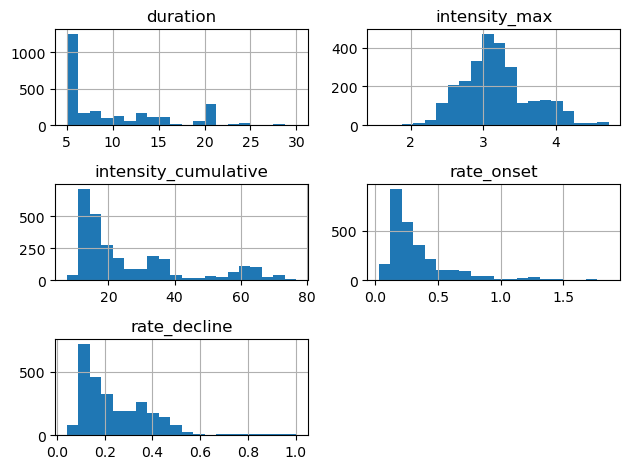

In [18]:
full_df.query('month == 1')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

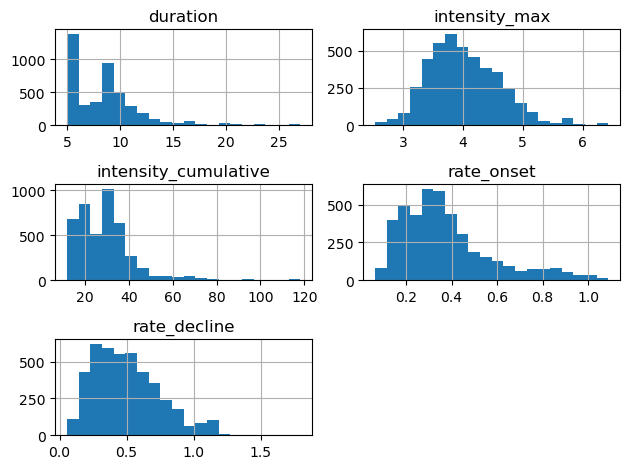

In [19]:
full_df.query('month == 5')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

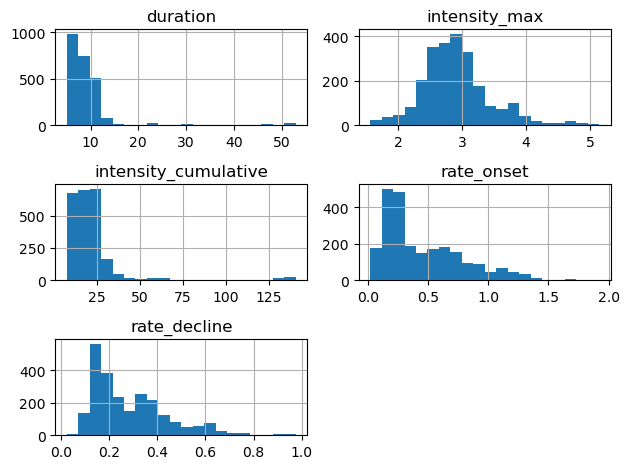

In [20]:
full_df.query('month == 11')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

### Back to regular analysis

In [21]:
monthly_counts.loc[6]

year
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008    445
2009      0
2010    652
2011    462
2012     10
2013      0
2014      0
2015    605
2016      0
2017     34
2018    610
2019    351
2020    198
2021    215
2022    207
Name: date_start, dtype: int64

In [22]:
occurences_avg = monthly_counts.groupby('month').mean()
occurences_std = monthly_counts.groupby('month').std()
occurences_st_err_mean = occurences_std.div(np.sqrt(monthly_counts.groupby('month').sum()), 
                                            axis='index')

In [23]:
occurences_st_err_mean.mean()

4.874639773879925

Averages and std for the characteristics

In [24]:
avgs = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].median(numeric_only=True)

In [25]:
stds = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].std(numeric_only=True)

In [26]:
stnd_err_median = stds.div(np.sqrt(monthly_counts.groupby('month').sum()), axis='index') * 1.2533

#### learning boxplots

In [27]:
df = full_df[['month', 'duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']]

In [28]:
df

,month,duration,intensity_max,intensity_cumulative,rate_onset,rate_decline
0,5,5,3.324872,15.122867,0.253078,0.663180
1,8,10,1.684177,14.729623,0.076271,0.067465
2,9,10,2.312266,18.926728,0.163285,0.164937
3,1,23,3.955075,69.213505,0.268372,0.129062
4,10,8,3.272488,20.524026,0.362400,0.446198
...,...,...,...,...,...,...
44,1,8,2.500940,17.489919,0.356923,0.106409
45,2,28,5.755224,112.674005,0.211117,0.197863
46,4,20,7.128409,98.660812,0.301955,0.622766
47,7,5,3.622499,16.799217,0.276197,0.158937


In [29]:
melted_df = pd.melt(df, id_vars=['month'], 
        value_vars=
        ['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 
         'rate_decline']
       )

In [30]:
melted_df = melted_df.rename(columns={'variable': 'characteristic'})

matplotlib docs `bootstrap` parameter describe bootstrapping process
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

/var/folders/nb/y7dp0ct55_58hrhrhlz5vbkm0000gn/T/ipykernel_5535/1404816377.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=90)


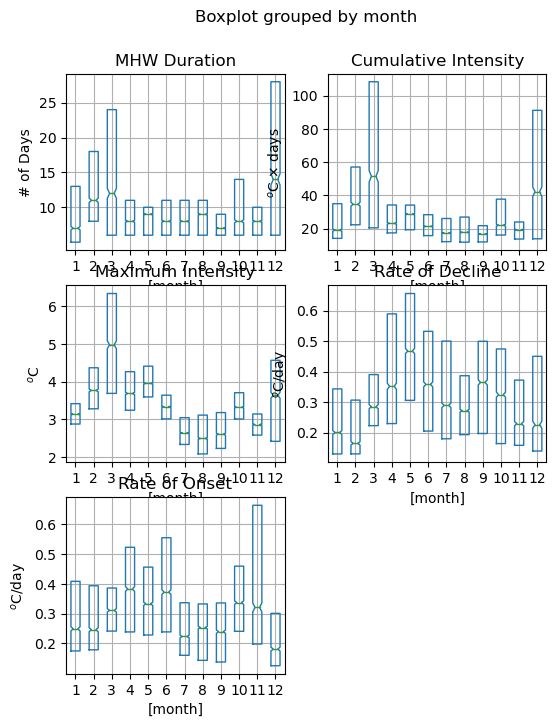

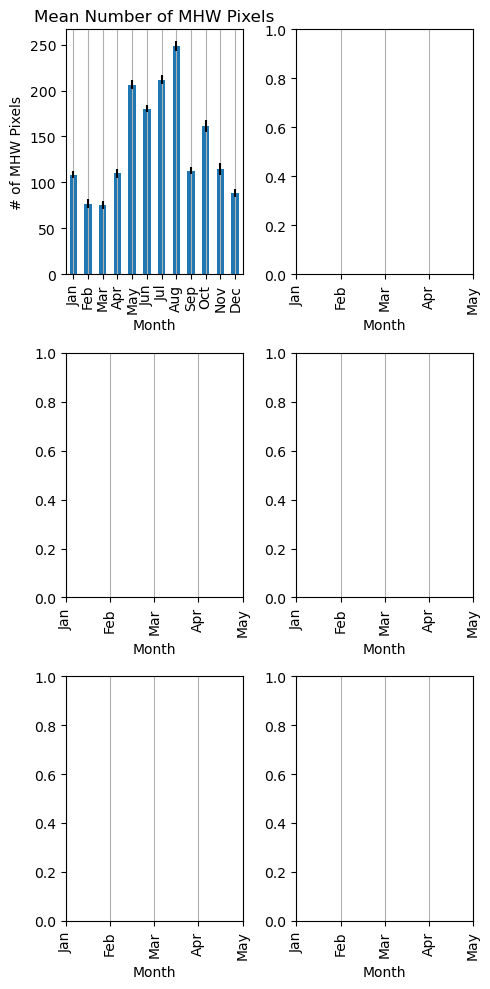

In [31]:
# only boostrap when saving the figure, because it takes several minutes
if SAVE_FIGS == True:
    bootstrap=2000
else:
    bootstrap=None
# plot box plots
boxplots = melted_df.groupby('characteristic').boxplot(
    by='month', figsize=(6, 8), sharey=False, whis=0, bootstrap=bootstrap,
    showfliers=False, showcaps=False, notch=True
)

# axes.duration.set_facecolor('red')
boxplots.duration.set_ylabel('# of Days')
boxplots.intensity_cumulative.set_ylabel(r'$^o$C $\times$ days')
boxplots.intensity_max.set_ylabel('$^o$C')
boxplots.rate_decline.set_ylabel('$^o$C/day')
boxplots.rate_onset.set_ylabel('$^o$C/day')

boxplots.duration.set_title('MHW Duration')
boxplots.intensity_cumulative.set_title('Cumulative Intensity')
boxplots.intensity_max.set_title('Maximum Intensity')
boxplots.rate_decline.set_title('Rate of Decline')
boxplots.rate_onset.set_title('Rate of Onset')

# increasing tick rate on plots where it is too low by default
boxplots.duration.set_yticks([10, 15, 20, 25]) 
boxplots.rate_decline.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6]) 
boxplots.rate_onset.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6])


fig, axes = plt.subplots(3, 2, figsize=(5, 10))

# plot mean MHW pixels
occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('# of MHW Pixels')

# axes[0, 1] = boxplots.duration
# axes[1, 0] = boxplots.intensity_max
# axes[1, 1] = boxplots.intensity_cumulative
# axes[2, 0] = boxplots.rate_onset
# axes[2, 1] = boxplots.rate_decline

(axes[0, 0], *boxplots) = axes.flat

# del boxplots

# rearrange axes
# new_series = pd.Series(plt.axes(), index=['new'])
# axes = pd.concat([new_series, axes])
# axes = axes.reindex(
#     ['new', 'duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 
#      'rate_decline']
# )

# axes[2, 1] = axes.rate_decline
# axes[2, 0] = axes.rate_onset
# axes[1, 1] = axes.intensity_cumulative
# axes[1, 0] = axes.intensity_max
# axes[0, 1] = axes.duration

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in axes.flatten():
    ax.set_xlabel('Month')
    # label months by name instead of number
    ax.set_xticklabels(months, rotation=90)
    # use only y axis gridlines
    ax.grid(axis='x')

plt.tight_layout()

plt.show()

In [31]:
axes[0, 0].remove()

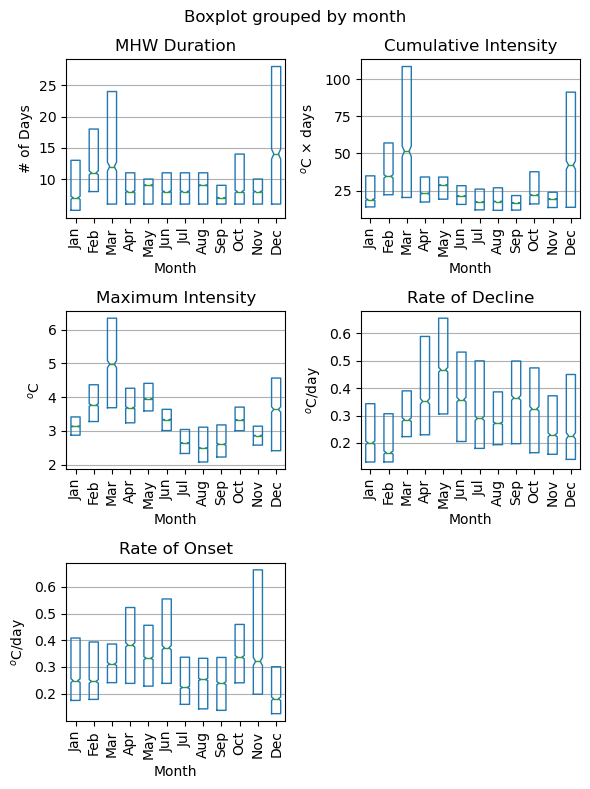

In [32]:
# fig, axes = plt.subplots(3, 2, figsize=(6, 8))

# axes[0, 0].remove()

# only boostrap when saving the figure, because it takes several minutes
if SAVE_FIGS == True:
    bootstrap=2000
else:
    bootstrap=None
# plot box plots
boxplots = melted_df.groupby('characteristic').boxplot(
    by='month', figsize=(6, 8), sharey=False, whis=0, bootstrap=bootstrap,
    showfliers=False, showcaps=False, notch=True,
)

# axes.duration.set_facecolor('red')
boxplots.duration.set_ylabel('# of Days')
boxplots.intensity_cumulative.set_ylabel(r'$^o$C $\times$ days')
boxplots.intensity_max.set_ylabel('$^o$C')
boxplots.rate_decline.set_ylabel('$^o$C/day')
boxplots.rate_onset.set_ylabel('$^o$C/day')

boxplots.duration.set_title('MHW Duration')
boxplots.intensity_cumulative.set_title('Cumulative Intensity')
boxplots.intensity_max.set_title('Maximum Intensity')
boxplots.rate_decline.set_title('Rate of Decline')
boxplots.rate_onset.set_title('Rate of Onset')

# increasing tick rate on plots where it is too low by default
boxplots.duration.set_yticks([10, 15, 20, 25]) 
boxplots.rate_decline.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6]) 
boxplots.rate_onset.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6])

# fig, axes = plt.subplots(3, 2, figsize=(5, 10))

# # plot mean MHW pixels
# occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
# axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
#                    fmt='none', ecolor='black')
# axes[0, 0].set_ylabel('# of MHW Pixels')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in boxplots.values.flatten():
    ax.set_xlabel('Month')
    # label months by name instead of number
    ax.set_xticklabels(months, rotation=90)
    # use only y axis gridlines
    ax.grid(axis='x')

plt.tight_layout()

plt.show()

In [ ]:
melted_df

In [ ]:
pd.pivot_table(df[['month', 'duration']], columns='month')

In [ ]:
df.columns

In [ ]:
df

### Seasonality plot restart here

In [33]:
monthly_counts

month  year
1      2002      0
       2003      0
       2004     10
       2005     14
       2006     13
              ... 
12     2018      0
       2019      0
       2020     55
       2021    304
       2022      0
Name: date_start, Length: 252, dtype: int64

In [34]:
no_pixels = monthly_counts.reset_index().pivot(index='year', columns='month')

In [35]:
no_pixels

date_start                                                           
month         1    2    3    4     5    6    7     8    9     10    11   12
year                                                                       
2002           0    0    0    0     0    0    0     0    0     0     0    0
2003           0    0    0    0     0    0    0     0    0     0     0    0
2004          10    0    0    0   564    0    0     0    0     0     0   52
2005          14    0    0    0     0    0    1   266  492     0     0    0
2006          13    0    0    0     0    0    0   115    0     0     0  255
2007         604    0    0    0     0    0    0     0   16  1480     0    0
2008          15   10    0    0     0  445    0     0    0     0     0    0
2009           9    0    0    0     0    0    0     4    0     0    19   15
2010           0    0    0  147    18  652    6     0    0     0     0    0
2011           0    0    0  125   707  462  208     0    0     0     0  302
2012         563  471  730  299   495   10  762    17   47     0     0   12
2013          33    0    0    6     0    0  231     0    0     0     0    0
2014           0    0    0    0    74    0    0     0   48     0     0    0
2015           0    0    0    3   231  605   66     0  162     0   152  783
2016          95    4  171    0     2    0  601  1063   92     0     0    0
2017         102  653    0  883    30   34   71     0  156   887   312   80
2018           0   25    0    0   707  610  391   847  407   352     0    0
2019         273    0    0  630  1185  351  948   370  560    96     0    0
2020         467  446  334    8     0  198  889   588   18     0  1457   55
2021           0    0   88  209    74  215  191   788  316   565     0  304
2022          80    0  257    0   250  207   83  1162   54     0   462    0

In [36]:
for i in range(0, 12):
    print("For month", i)
    data = no_pixels.values.transpose().tolist()[i]
    print('25', np.percentile(data, 25))
    print('50', np.median(data))
    print('75', np.percentile(data, 75))
    print('-------')

For month 0
25 0.0
50 13.0
75 95.0
-------
For month 1
25 0.0
50 0.0
75 4.0
-------
For month 2
25 0.0
50 0.0
75 0.0
-------
For month 3
25 0.0
50 0.0
75 125.0
-------
For month 4
25 0.0
50 18.0
75 250.0
-------
For month 5
25 0.0
50 10.0
75 351.0
-------
For month 6
25 0.0
50 66.0
75 231.0
-------
For month 7
25 0.0
50 0.0
75 370.0
-------
For month 8
25 0.0
50 18.0
75 156.0
-------
For month 9
25 0.0
50 0.0
75 0.0
-------
For month 10
25 0.0
50 0.0
75 0.0
-------
For month 11
25 0.0
50 0.0
75 55.0
-------


{'whiskers': [<matplotlib.lines.Line2D at 0x1586be430>,
 'caps': [],
 'boxes': [<matplotlib.lines.Line2D at 0x1586be190>,
 'medians': [<matplotlib.lines.Line2D at 0x1586be280>,
 'fliers': [],
 'means': []}

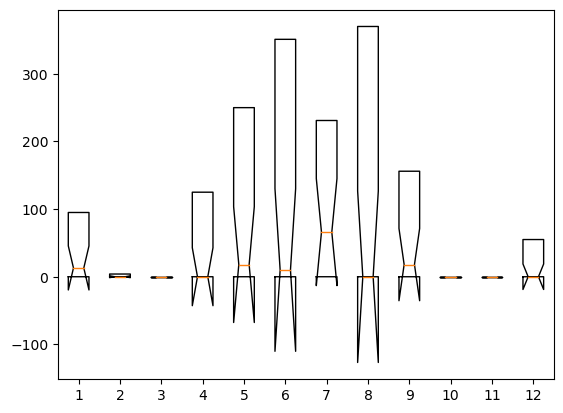

In [37]:
# Bug in boxplot?
plt.boxplot(no_pixels.values.transpose().tolist(), whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)

In [38]:
df[['month', 'duration']]

,month,duration
0,5,5
1,8,10
2,9,10
3,1,23
4,10,8
...,...,...
44,1,8
45,2,28
46,4,20
47,7,5


In [39]:
output_dict = {}
for characteristic in ['duration', 'intensity_max', 'intensity_cumulative',
       'rate_onset', 'rate_decline']:
    for name, group in df[['month', characteristic]].groupby('month'):
        if name == 1:
            jan = group[characteristic].values
        elif name == 2:
            feb = group[characteristic].values
        elif name == 3:
            mar = group[characteristic].values
        elif name == 4:
            apr = group[characteristic].values
        elif name == 5:
            may = group[characteristic].values
        elif name == 6:
            jun = group[characteristic].values
        elif name == 7:
            jul = group[characteristic].values
        elif name == 8:
            aug = group[characteristic].values
        elif name == 9:
            sep = group[characteristic].values
        elif name == 10:
            oct = group[characteristic].values
        elif name == 11:
            nov = group[characteristic].values
        elif name == 12:
            dec = group[characteristic].values
    
    output_dict[characteristic] = [jan, feb, mar, apr, may, jun, jul, aug, 
                                   sep, oct, nov, dec]

In [40]:
# durations = np.full((5258, 12), np.nan)
# months = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

# for i, arr in enumerate(months):
#     durations[:len(arr), i] = arr
#     print(i, len(arr))

In [41]:
output_dict.keys()

dict_keys(['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline'])

In [42]:
occurences_avg

month
1     108.476190
2      76.619048
3      75.238095
4     110.000000
5     206.523810
6     180.428571
7     211.809524
8     248.571429
9     112.761905
10    160.952381
11    114.380952
12     88.476190
Name: date_start, dtype: float64

In [43]:
len(output_dict['duration'])

12

In [44]:
np.percentile(output_dict['duration'][5], 50)

8.0

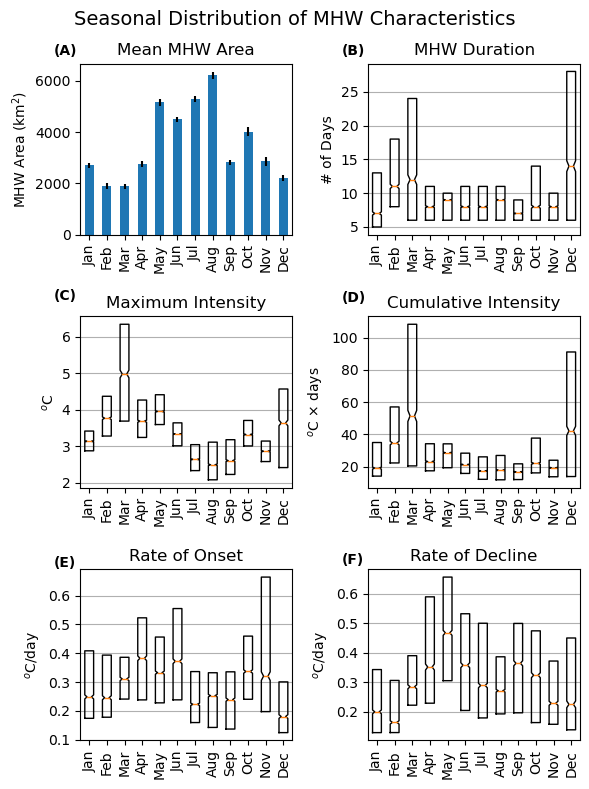

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(6, 8))
fig.suptitle('Seasonal Distribution of MHW Characteristics', fontsize=14)

# only boostrap when saving the figure, because it takes several minutes
if SAVE_FIGS is True:
    bootstrap=2000
else:
    bootstrap=None

(occurences_avg*25).plot(ax=axes[0, 0], kind='bar', title='Mean MHW Area')
axes[0, 0].errorbar(range(0, 12), (occurences_avg*25).values, yerr=(occurences_st_err_mean*25).values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('MHW Area (km$^2$)')
axes[0, 0].text(-2, 7000, '(A)', weight='bold')

axes[0, 1].boxplot(output_dict['duration'], whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)
axes[0, 1].set_ylabel('# of Days')
axes[0, 1].set_title('MHW Duration')
axes[0, 1].text(-1, 30.5, '(B)', weight='bold')

axes[1, 0].boxplot(output_dict['intensity_max'], whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)
axes[1, 0].set_ylabel('$^o$C')
axes[1, 0].set_title('Maximum Intensity')
axes[1, 0].text(-1, 7, '(C)', weight='bold')

axes[1, 1].boxplot(output_dict['intensity_cumulative'], whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)
axes[1, 1].set_ylabel(r'$^o$C $\times$ days')
axes[1, 1].set_title('Cumulative Intensity')
axes[1, 1].text(-1, 122, '(D)', weight='bold')

axes[2, 0].boxplot(output_dict['rate_onset'], whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)
axes[2, 0].set_ylabel('$^o$C/day')
axes[2, 0].set_title('Rate of Onset')
axes[2, 0].text(-1, 0.7, '(E)', weight='bold')

axes[2, 1].boxplot(output_dict['rate_decline'], whis=0, bootstrap=bootstrap, showfliers=False, 
                   showcaps=False, notch=True)
axes[2, 1].set_ylabel('$^o$C/day')
axes[2, 1].set_title('Rate of Decline')
axes[2, 1].text(-1, 0.7, '(F)', weight='bold')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']

for ax in axes.flatten():
    ax.set_xlabel('Month')
    # label months by name instead of number
    ax.set_xticklabels(months, rotation=90)
    # use only y axis gridlines
    ax.grid(axis='y')
    ax.set_xlabel('')

axes[0, 0].grid(False)

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(REPO_ROOT / 'figures' / 'seasonality.png', dpi=450, 
                bbox_inches='tight')

In [46]:
SAVE_FIGS

False

In [ ]:
durations[0, 13]

In [ ]:
durations

In [ ]:
durations

In [ ]:
df.iloc[df.groupby('month').groups[1]]

In [ ]:
melted_df.groupby('characteristic').groups

In [ ]:
fig = axes[0, 0].get_figure()

In [ ]:
fig.set

In [ ]:
df_plots = pd.DataFrame({'Group':['A','A','A','A','A','A','B','B','B','B','B','B'],
                         'Type':['X','X','X','Y','Y','Y','X','X','X','Y','Y','Y'],
                         'Value':[1,1.2,1.4,1.3,1.8,1.5,15,19,18,17,12,13]})
df_plots

In [ ]:
df_plots.groupby('Group').boxplot(by='Type')

In [ ]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(6, 8)
fig.suptitle('Seasonal Distributions of MHW Characteristics')

occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('# of MHW Pixels')

avgs.duration.plot(ax=axes[0, 1], kind='bar', title='Median MHW Duration')
axes[0, 1].errorbar(range(0, 12), avgs.duration.values, yerr=stnd_err_median.duration.values,
                   fmt='none', ecolor='black')
axes[0, 1].set_ylabel('# of Days')

avgs.intensity_max.plot(ax=axes[1, 0], kind='bar', title='Median Maximum Intensity')
axes[1, 0].errorbar(range(0, 12), avgs.intensity_max.values, 
                    yerr=stnd_err_median.intensity_max.values,
                   fmt='none', ecolor='black')
axes[1, 0].set_ylabel('$^o$C')

avgs.intensity_cumulative.plot(ax=axes[1, 1], kind='bar', 
                               title='Median Cumulative Intensity')
axes[1, 1].errorbar(range(0, 12), avgs.intensity_cumulative.values, 
                    yerr=stnd_err_median.intensity_cumulative.values, 
                    fmt='none', ecolor='black')
axes[1, 1].set_ylabel(r'$^o$C $\times$ days')

avgs.rate_onset.plot(ax=axes[2, 0], kind='bar', title='Median Rate of Onset')
axes[2, 0].errorbar(range(0, 12), avgs.rate_onset.values, 
                    yerr=stnd_err_median.rate_onset.values,
                   fmt='none', ecolor='black')
axes[2, 0].set_ylabel('$^o$C/day')

avgs.rate_decline.plot(ax=axes[2, 1], kind='bar', title='Median Rate of Decline')
axes[2, 1].errorbar(range(0, 12), avgs.rate_decline.values, 
                    yerr=stnd_err_median.rate_decline.values,
                   fmt='none', ecolor='black')
axes[2, 1].set_ylabel('$^o$C/day')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in axes.flatten():
    ax.set_xticks(np.linspace(0, 11, 12))
    ax.set_xticklabels(months)

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(os.path.join(REPO_ROOT, 'figures', 'seasonality.pdf'), dpi=450, 
                bbox_inches='tight')

In [ ]:
seasons = np.full(event_statistics.shape, np.nan)
# seasons = [[0]*event_statistics.shape[1]]*event_statistics.shape[0]
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
        # df['month'] = df.date_start.dt.month
            df['season'] = df.apply(get_season, axis=1)
            seasons[i, j] = df.season.mode().iloc[0]  # TODO just picking one
        else:
            seasons[i, j] = np.nan

Most MHW definetly happen in summer

In [ ]:
xr.DataArray(seasons).plot()

## Bigger and better: improved seasonality analysis

**TODO** using 16 km^2 for area for now, so it isn't an over estimate. Go back later and count more accurately.

In [25]:
# Not a good error. Worth reporting to pandas in a GH issue?
# Should just inform that index is out of range
counts.loc['2090-10-03']

NameError: name 'counts' is not defined

In [ ]:
counts = pd.DataFrame(index=pd.date_range('2002-01-01', '2023-12-31'), 
                      columns=['pixel_count'], data=0)

# Loop through each of the pixels in the AOI
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        # Loop through each MHW in that pixel
        stats_dict = event_statistics[i, j]
        # skip processing if there were no MHW in that pixel (land pixel)
        if len(stats_dict['date_start']) == 0:
               continue
        print('processing mhws')
        for mhw_idx in range(len(stats_dict['date_start'])):
            # Create a list of dates that experienced a MHW
            days = pd.date_range(
                stats_dict['date_start'][mhw_idx], stats_dict['date_end'][mhw_idx]
            )
            # Increment the counter for each of those dates
            for day in days:
                counts.loc[day] += 1

In [ ]:
counts.plot(logy=True, legend=False, figsize=(10, 3))

In [ ]:
counts['month'] = counts.index.month

In [ ]:
counts['area'] = counts['pixel_count'] * 16

In [ ]:
monthly_area = counts.groupby('month')['area'].sum()

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots()

ax.set_title('Total MHW Affected Area by Month')
monthly_area.plot(ax=ax, kind='bar', )
ax.set_xticklabels(months)
ax.set_ylabel('Total Area ($km^2$)')
ax.set_xlabel('Month')

if SAVE_FIGS:
    plt.savefig('../figures/seasonality.pdf', dpi=450, 
                bbox_inches='tight')